In [2]:
#1. Importar as bibliotecas necessárias

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram


In [6]:
iris = datasets.load_iris()
print(iris.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]

[[50  0  0]
 [ 0  3 47]
 [ 0 36 14]]


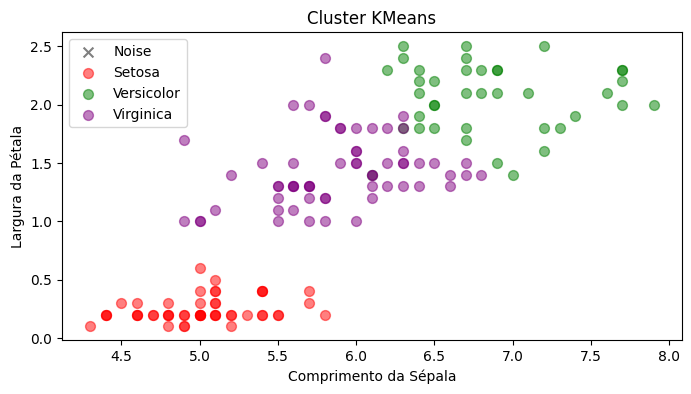

In [18]:
kmeans = KMeans(n_clusters = 3, n_init = "auto")
kmeans.fit(iris.data)
print(kmeans.labels_)

matriz_confusao = confusion_matrix(iris.target, kmeans.labels_)
print()
print(matriz_confusao)

plot_clusters(iris.data, kmeans.labels_, "Cluster KMeans")



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


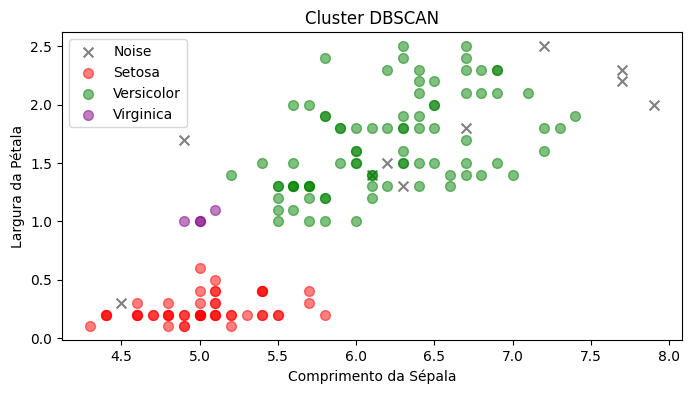

In [19]:
dbscan = DBSCAN(eps = 0.5, min_samples = 3)
dbscan_labels = dbscan.fit_predict(iris.data)
print(dbscan_labels)

plot_clusters(iris.data, dbscan_labels, "Cluster DBSCAN")



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


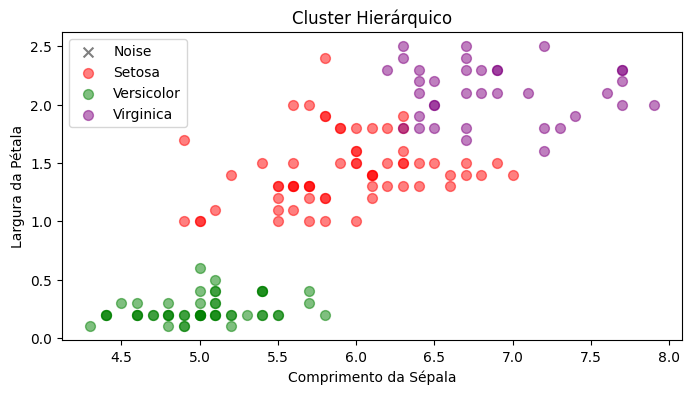

In [20]:
agglo = AgglomerativeClustering(n_clusters = 3)
agglo_labels = agglo.fit_predict(iris.data)
print(agglo_labels)
matriz_confusao = confusion_matrix(iris.target, agglo_labels)
print()
print(matriz_confusao)

plot_clusters(iris.data, agglo_labels, "Cluster Hierárquico")


In [17]:
def plot_clusters(data, labels, title):
    colors = ["red", "green", "purple", "black"]
    plt.figure(figsize = (8, 4))
    for i, c, l in zip(range(-1, 3), colors, ["Noise", "Setosa", "Versicolor", "Virginica"]):
        if i == -1:
            plt.scatter(data[labels == i, 0], data[labels == i, 3], c = colors[i], label = l, alpha = 0.5, s = 50, marker = "x")
        else:
            plt.scatter(data[labels == i, 0], data[labels == i, 3], c = colors[i], label = l, alpha = 0.5, s = 50)
    plt.legend()
    plt.title(title)
    plt.xlabel("Comprimento da Sépala")
    plt.ylabel("Largura da Pétala")
    plt.show()

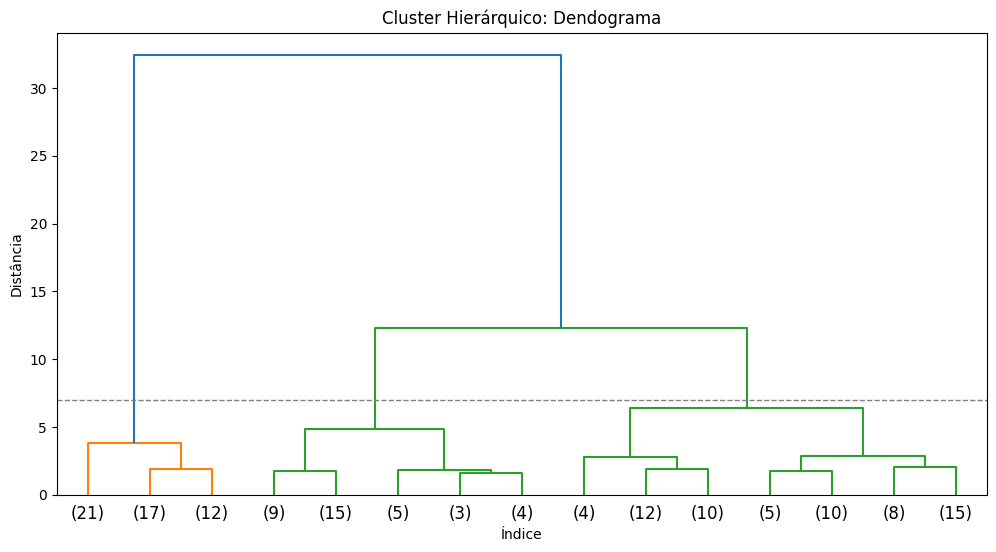

In [21]:
plt.figure(figsize = (12, 6))
plt.title("Cluster Hierárquico: Dendograma")
plt.xlabel("Índice")
plt.ylabel("Distância")

linkage_matrix = linkage(iris.data, method = "ward")
dendrogram(linkage_matrix, truncate_mode = "lastp", p = 15)
plt.axhline(y = 7, c = "gray", lw = 1, linestyle = "dashed")
plt.show()
